In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import random
random.seed(101)

In [ ]:
df=pd.read_csv('/content/titanic_data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dict_live={
    0:"died",
    1:"survived"

}
dict_sex={
    'male':0,
    'female':0
}
df['Bsex']=df['Sex'].apply(lambda x:dict_sex[x])

# features
features=df[['Pclass','Bsex']].to_numpy()
labels=df['Survived'].to_numpy()

In [ ]:
features

array([[3, 0],
       [1, 0],
       [3, 0],
       ...,
       [3, 0],
       [1, 0],
       [3, 0]])

In [ ]:
# splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.30,random_state=0)

In [ ]:
# activation function and derivation

In [ ]:
def sigmoid(x,derivative=False):
  if derivative==True:
    f=1/(1+np.exp(-x))*(1-1/(1+np.exp(-x)))
  else:
    f=1/(1+np.exp(-x))
  return f

def ReLU(x,derivative=False):
  if derivative==True:
    f=np.heaviside(x,1)
  else:
    f=np.maximum(x,0)
  return f





In [ ]:
def train_ANN(x_train,y_train,h1_units=4,h2_units=4,learning_rate=0.0015):
  random.seed(101)

  # hidden layer 1
  w1=2*np.random.rand(4,x_train.shape[1])
  b1=np.random.rand(h1_units)

  #  hidden layer 2
  w2=2*np.random.rand(h2_units,h1_units)
  b2=np.random.rand(h2_units)

  # o/p layer
  w_out=2*np.random.rand(h2_units)
  b_out=np.random.rand(1)

  loss=[]
  vec_y=[]

  for i in range(0,x_train.shape[0]):
    x_df=x_train[i]

    # feed forward
    h1=ReLU(np.dot(w1,x_df)+b1)
    h2=ReLU(np.dot(w2,h1)+b2)
    y=sigmoid(np.dot(w_out,h2)+b_out)

    # back propagation
    delta_out=(y-y_train[i])*sigmoid(y,derivative=True)
    delta_2=delta_out*w_out*ReLU(h2,derivative=True)
    delta_1=np.dot(delta_2,w2)*ReLU(h1,derivative=True)

    # gradient descent
    w_out=w_out-learning_rate*delta_out*h2     #o/p layer
    b_out=b_out-learning_rate*delta_out

    # hidden layer 2
    w2=w2-learning_rate*np.kron(delta_2,h1).reshape(h2_units,h1_units)
    b2=b2-learning_rate*delta_2

    # hidden layer 2
    w1=w1-learning_rate*np.kron(delta_1,x_df).reshape(h1_units,x_df.shape[0])
    b1=b1-learning_rate*delta_1

    # cost
    loss.append((1/2)*(y-y_train[i]**2))
    vec_y.append(y[0])

  batch_loss=[]
  for i in range(0,10):
    loss_avg=0
    for m in range(0,60):
      loss_avg+=vec_y[60*i+m]/60
    batch_loss.append(loss_avg)

  plt.figure(figsize=(10,6))
  plt.plot(np.arange(1,len(batch_loss)+1),batch_loss)
  plt.title('Average loss by epoch',fontsize=20)
  plt.xlabel('Epoch',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.show()

  return w1,b1,w2,b2,w_out,b_out,loss




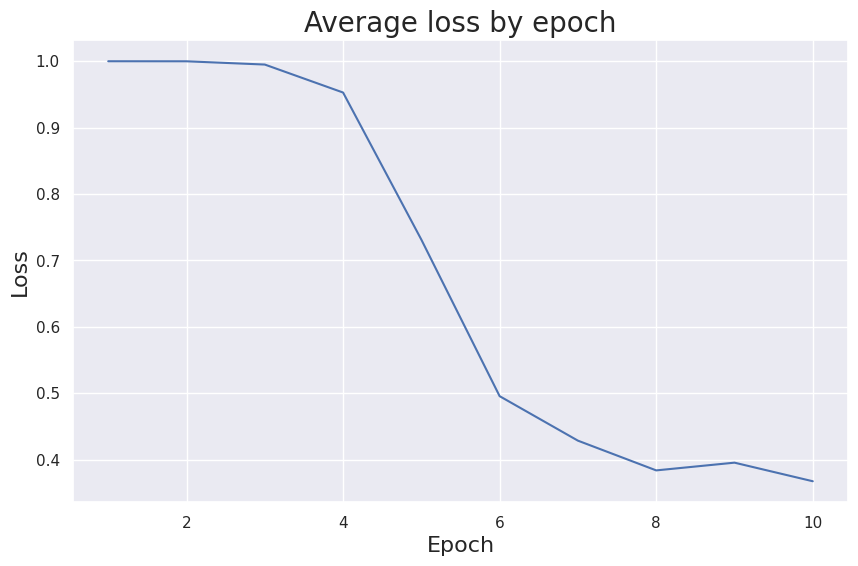

In [ ]:
w1, b1, w2, b2, w_out, b_out, loss= train_ANN(x_train,y_train)

In [ ]:
def ANN_pred(x_test,w1,b1,w2,b2,w_out,b_out):
  pred=[]
  for i in range(0,x_test.shape[0]):
    x=x_test[i]

    z1=ReLU(np.dot(w1,x)+b1)
    z2=ReLU(np.dot(w2,z1)+b2)
    y=sigmoid(np.dot(w_out,z2)+b_out)

    pred.append(np.heaviside(y-0.5,1)[0])
  return np.array(pred)



In [ ]:
predictions=ANN_pred(x_test,w1,b1,w2,b2,w_out,b_out)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,predictions)

df_cm=pd.DataFrame(cm,index=[dict_live[i]for i in range(0,2)],
                   columns=[dict_live[i]for i in range(0,2)])

In [ ]:
cm

array([[147,  21],
       [ 61,  39]])

In [ ]:
df_cm

,died,survived
died,147,21
survived,61,39


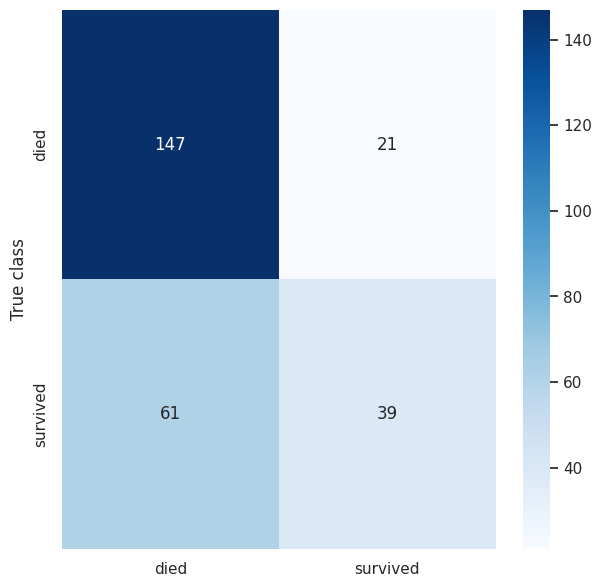

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df_cm,annot=True,cmap=plt.cm.Blues,fmt='g')
plt.xlabel=("Predicted class")
plt.ylabel("True class")
plt.show()

In [ ]:
accuracy_score(y_test,predictions)

0.6940298507462687